In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.pyplot import figure

## EDA & Data Cleaning

#### Read & Review Dataset

In [149]:
rescue_df = pd.read_csv('rescuetime-history.csv')
rescue_df.head()

,2019-08-19 09:00:00 -0700,slack,"Slack | Zach Milleson, Jason Bruno | AHEAD",Communication & Scheduling,Instant Message,179
0,2019-08-19 09:00:00 -0700,thinkaheadit.sharepoint.com,No Details,Uncategorized,Uncategorized,66
1,2019-08-19 09:00:00 -0700,msedge,No Details,Utilities,Browsers,56
2,2019-08-19 09:00:00 -0700,rescuetime.com,RescueTime - Privacy settings - Google Chrome,Business,Intelligence,43
3,2019-08-19 09:00:00 -0700,rescuetime.com,RescueTime - Your Daily dashboard - Google Chrome,Business,Intelligence,27
4,2019-08-19 09:00:00 -0700,linkedin.com,Ryan Heringhaus - Director of America's Techni...,Social Networking,Professional Networking,19


#### Rename Columns

In [150]:
new_columns = ['date','app_name','app_details','app_category','app_type','app_usage']
rescue_df.columns = new_columns
print(rescue_df.columns)
print(rescue_df.info())

Index(['date', 'app_name', 'app_details', 'app_category', 'app_type',
       'app_usage'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52970 entries, 0 to 52969
Data columns (total 6 columns):
date            52970 non-null object
app_name        52952 non-null object
app_details     52970 non-null object
app_category    52970 non-null object
app_type        52970 non-null object
app_usage       52970 non-null int64
dtypes: int64(1), object(5)
memory usage: 2.4+ MB
None


#### Clean NaN Values & Drop Rows

In [151]:
rescue_df.replace('',np.nan)
rescue_df.dropna(inplace=True)
rescue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52952 entries, 0 to 52969
Data columns (total 6 columns):
date            52952 non-null object
app_name        52952 non-null object
app_details     52952 non-null object
app_category    52952 non-null object
app_type        52952 non-null object
app_usage       52952 non-null int64
dtypes: int64(1), object(5)
memory usage: 2.8+ MB


#### Remove UTC, Time and Convert Column to DateTime

In [152]:
utc_rem = []
for r in rescue_df['date']:
    dte = r[:-15]
    utc_rem.append(dte)
    
rescue_df['date'] = utc_rem
rescue_df['date'] = rescue_df['date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))
rescue_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52952 entries, 0 to 52969
Data columns (total 6 columns):
date            52952 non-null datetime64[ns]
app_name        52952 non-null object
app_details     52952 non-null object
app_category    52952 non-null object
app_type        52952 non-null object
app_usage       52952 non-null int64
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 2.8+ MB


In [110]:
grouped_app = rescue_df.copy()
grouped_app = grouped_app.groupby('app_name',as_index=False).agg(np.sum)
grouped_app_sorted = grouped_app.sort_values(by='app_usage',ascending=False)
grouped_app_sorted.head(10)

,app_name,app_usage
1622,slack,1045729
1211,msedge,392583
154,atmgr,144979
1771,teams,122560
682,facebook.com,118398
1337,outlook,104276
2040,youtube.com,81926
1418,powerpnt,77584
116,app.dataquest.io,53738
1090,mail.google.com,45832


In [111]:
usage_hours = []
for s in grouped_app_sorted['app_usage']:
    h = round(s / 3600)
    usage_hours.append(h)

grouped_app_sorted['app_usage'] = usage_hours
grouped_app_sorted_top = grouped_app_sorted.head(10)
grouped_app_sorted_top

,app_name,app_usage
1622,slack,290
1211,msedge,109
154,atmgr,40
1771,teams,34
682,facebook.com,33
1337,outlook,29
2040,youtube.com,23
1418,powerpnt,22
116,app.dataquest.io,15
1090,mail.google.com,13


In [112]:
grouped_app_sorted_top['app_name'] = grouped_app_sorted_top['app_name'].replace({'atmgr':'webex',
                                                                                 'facebook.com':'facebook',
                                                                                 'youtube.com':'youtube',
                                                                                 'mail.google.com':'gmail',
                                                                                 'app.dataquest.io':'dataquest',
                                                                                 'powerpnt':'powerpoint'})

grouped_app_sorted_top

C:\Users\ben.prescott\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,app_name,app_usage
1622,slack,290
1211,msedge,109
154,webex,40
1771,teams,34
682,facebook,33
1337,outlook,29
2040,youtube,23
1418,powerpoint,22
116,dataquest,15
1090,gmail,13


<BarContainer object of 10 artists>

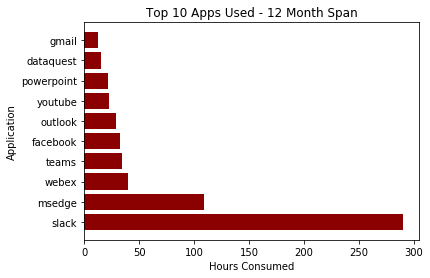

In [113]:
apps = grouped_app_sorted_top['app_name']
hours = grouped_app_sorted_top['app_usage']

plt.title('Top 10 Apps Used - 12 Month Span')
plt.ylabel('Application')
plt.xlabel('Hours Consumed')
plt.barh(apps,hours,color='darkred')

In [ ]:
### LEFT OFF HERE ###

grouped_date = rescue_df.copy()
grouped_date_sorted = grouped_date.sort_values(by='date',ascending=False)
grouped_date_sorted